## Matricule & noms : 

### <center> ELE8812 - Traitement et analyse d'images </center>
<center> Travail practique No. 1 </center>
<center>Hiver 2021 </center>

<div class="alert alert-block alert-danger">
Ce <a href="https://realpython.com/matlab-vs-python/"> lien</a> vous permettra de voir les différences fondamentales entre Python et Matlab. Ne passez pas forcement par les étapes d'installation.
</div>

L’objet de ce travail est de mettre en pratique certains des traitements élémentaires dans le domaine spatial qui ont été présentés en cours, tout en permettant une familiarisation avec Python et ses outils de traitement d’images. Trois points seront abordés :
1. Les transformations géométriques
2. Le débruitage par filtrage dans le domaine spatial
3. L’amélioration d’images par manipulation d’histogramme et masque flou

Les fonctions et les données à utiliser pour effectuer ce travail pratique se trouvent
dans l’archive ZIP de ce TP disponible sur le site web du cours. 

**Pondération**
- Transformations géométriques : 6 pts
- Débruitage par filtrage spatial : 6 pts
- Amélioration d’images : 6 pts
- Qualités de la langue et du rapport : 2 pts
- Total : 20 points

**Date de remise**
- Groupe 1: 14 février 23h59
- Groupe 2: 21 février 23h59

##  1. Transformations géométriques (6 pts)

L’interpolation est un élément central de toute transformation géométrique d’image.
L’objet de cette question est de mettre en œuvre une forme élémentaire d’interpolation et
de l’utiliser dans une transformation géométrique particulièrement simple : le changement
d’échelle d’une image à l’aide d’une interpolation par plus proche voisin.
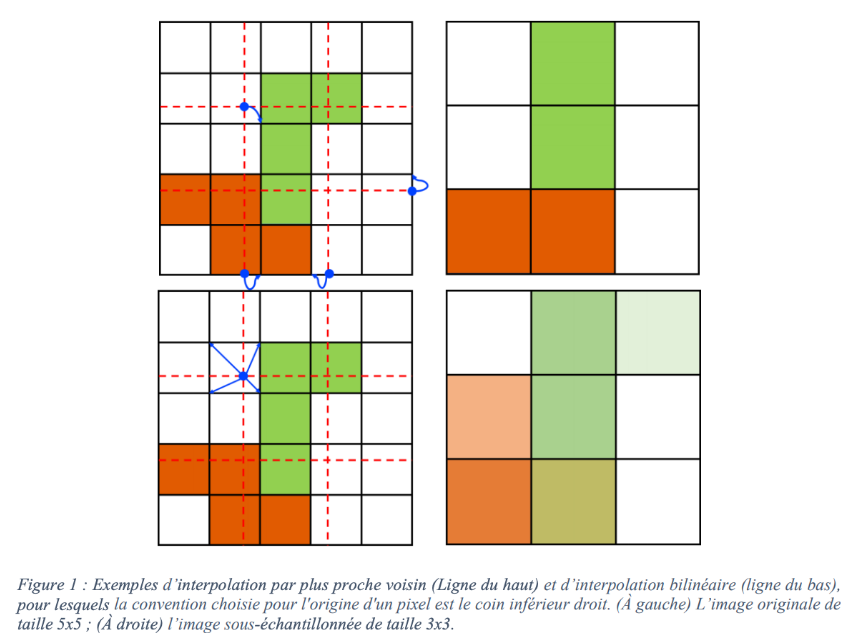

<div class="alert alert-block alert-info">


La cellule ci dessous effectue des <code>import</code> cela s'assimile a un<code>addpath</code> en matlab. Le but est d'amener des fonctions extérieures (packages) dans le notebook afin que Python les reconnaisse.  
<code> import package as pkg</code> permet de raccourcir le nom de ce dernier. Les fonctions contenues dans 'package' seront alors appelées ainsi <code>pkg.function()</code><br>
    
Vous pouvez chercher sur google chacun des package appelés ci-dessous afin d'obtenir leur documentation.<br>

N'oubliez pas de relancer cette cellule si jamais vous redemarrez le Kernel !!
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
%matplotlib inline
import cv2
import numpy as np
plt.rcParams["figure.figsize"] = (12, 10)


### 1.1. Fonction de changement d’échelle (3 pts)
<div class="alert alert-block alert-warning">
Développez une fonction définie comme suit. <br>

- Indiquez la manière dont vous définissez les coordonnées de l’origine de chaque pixel d’une image (ex : au centre du pixel, dans le coin supérieur gauche …)

- Décrivez chacune des étapes vous permettant de passer de l’image im à l’image ims.

<b>Remarque</b> : Dans la fonction mae_ppv que vous développerez, vous ne devez pas utiliser
les fonctions d’interpolation existantes. Par contre, vous pouvez vous inspirer de la fonction mae_bil.m qui implémente une interpolation bilinéaire.
    </div>

In [2]:
# Inscrivez votre code ici
# Compléter la fonction suivante faisant de l'interpolation par plus proche voisin.
def mae_ppv(im, sc):
    """ Interpolation par plus proche voisin d'une image im.
    im (nd.array): Image à interpoler.
    sc (float): Facteur d'échelle.
    
    Return:
        nd.array: Image interporlée.
    """
    if sc <= 0 :
        display('scale : le parametre d echelle doit etre > 0')
        return
    
    if np.ndim(im) != 2 :
        display('Image doit avoir 2 dimensions')
        return
    
    M, N = im.shape 

    
    Ms, Ns = [round(M * sc), round(N * sc)]   
 
    ims = np.zeros((Ms,Ns))
    
    for i in range(Ms):
        for j in range(Ns):
            ims[i,j] = im[round(i/sc),round(j/sc)]
        
        
    
   
    return ims

In [3]:
def mae_bil(im, sc):
    """ Interpolation bilinéaire d'une image im.
    im (nd.array): Image à interpoler.
    sc (float): Facteur d'échelle.
    
    Return:
        nd.array: Image interporlée.
    """
    
    if sc <= 0 :
        display('scale : le parametre d echelle doit etre > 0')
        return
    

    if np.ndim(im) != 2 :
        display('Image doit avoir 2 dimensions')
        return

    M, N = im.shape

    # Nouvelles dimensions de l'image
    Ms, Ns = [round(M * sc), round(N * sc)]

    xs = np.linspace(1, Ms, Ms)
    ys = np.linspace(1, Ns, Ns)

    xsp = xs * M / Ms
    ysp = ys * N / Ns
    
    # Ajouter un pixel autour car il faut interpoler les pixels sur les bords
    Ap = np.pad(im, 1, 'symmetric')
    
    # Extraire les nouvelles coordonnées de l'image
    xisp = np.floor(xs * M / Ms).astype(int)
    yisp = np.floor(ys * N / Ns).astype(int)
    
    [Xsp, Ysp] = np.meshgrid(xsp,ysp)
    Xsp = np.transpose(Xsp)
    Ysp = np.transpose(Ysp)

    Xfsp = Xsp - np.floor(Xsp) # Coefficients pour l'interpolation
    Yfsp = Ysp - np.floor(Ysp)  

    # Interpolation bilinéaire
    ims = (1 - Xfsp) * (1 - Yfsp) * Ap[xisp, :][:, yisp] + \
          Xfsp * (1-Yfsp) * Ap[xisp + 1, :][:, yisp] + \
          (1 - Xfsp) * Yfsp * Ap[xisp, :][:, yisp + 1] + \
          Xfsp * Yfsp * Ap[xisp + 1, :][:, yisp + 1]
    
    return ims

### 1.2. Effet de l’interpolation (3 pts)
<div class="alert alert-block alert-warning">

- Pour mettre en évidence l’effet de l’interpolation, utilisez la fonction que vous avez
développée pour changer l’échelle de l’image Barbara.tif d’un facteur α
inférieur à 1. Utilisez ensuite la même fonction et un facteur de 1/ α pour la ramener
l’image transformée à son échelle initiale.
  </div>

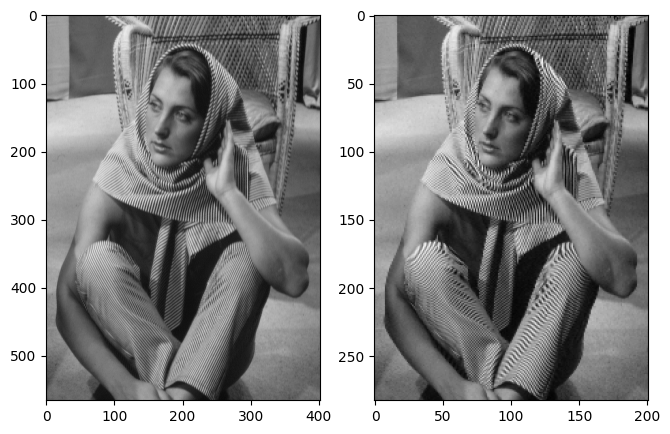

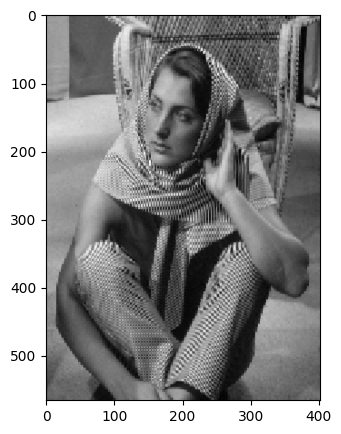

In [4]:
# Inscrivez votre code ici

oldIm = imread('Barbara.tif')
sc = 0.5
reSc = 1/sc
newIm = mae_ppv(oldIm,sc)
reIm = mae_ppv(newIm,reSc)
plt.subplot(1,3,1)
plt.imshow(oldIm, cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(newIm, cmap = 'gray')
plt.show()
plt.subplot(1,3,3)
plt.imshow(reIm, cmap = 'gray')
plt.show()

<div class="alert alert-block alert-warning">


- Effectuez les mêmes opérations avec la fonction mae_bil,
qui utilise une interpolation bilinéaire.
  </div>

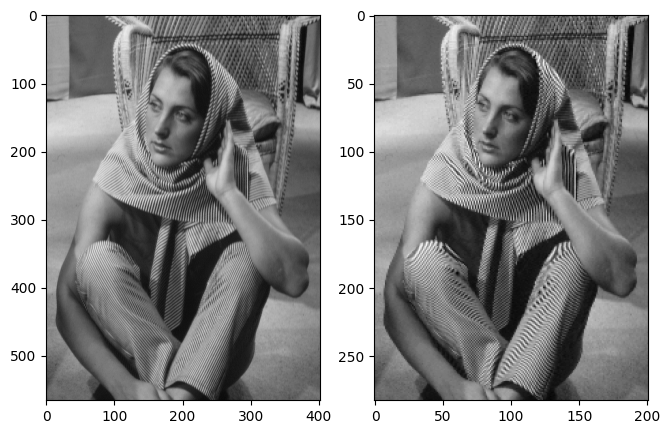

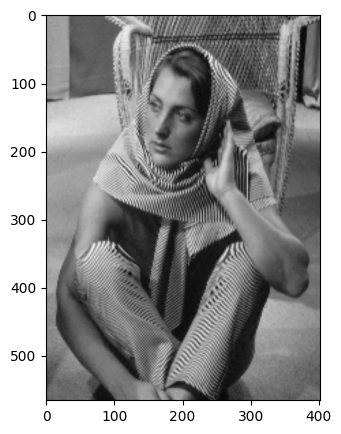

In [5]:
# Inscrivez votre code ici
 # Inscrivez votre code ici
oldIm2 = imread('Barbara.tif')
sc = 0.5
reSc = 1/sc
newIm2 = mae_bil(oldIm2,sc)
reIm2 = mae_bil(newIm2,reSc)
plt.subplot(1,3,1)
plt.imshow(oldIm2, cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(newIm2, cmap = 'gray')
plt.show()
plt.subplot(1,3,3)
plt.imshow(reIm2, cmap = 'gray')
plt.show()

<div class="alert alert-block alert-warning">

- Qu’observez-vous ? Est-ce que les deux schémas d’interpolation permettent de
reproduire fidèlement l’image originale ? À quoi sont dues les différences
observées ? Pour répondre à cette question, vous pouvez calculer l’erreur
quadratique moyenne entre les images.

\begin{equation*}
\Delta Q = \frac 1 n  \sum_{i,j}\left( I \left( i,j \right) - I' \left( i,j \right) \right)^2
\end{equation*}


Où n est le nombre de pixel dans l’image, 𝐼(𝑖,𝑗) est un pixel de l’image original et
𝐼’(𝑖,𝑗) est le pixel correspondant dans l’image transformée. Vous pouvez aussi
observer l’histogramme des différences d’intensité entre les images.

 </div>


In [6]:
# Inscrivez votre code ici
M, N = oldIm.shape
n = M*N
error = 0

for i in range(M):
    for j in range(N):
        error += (oldIm[i,j]-reIm[i,j])**2
        
TrueError =(1/n)*error
print('erreur = ', TrueError)

erreur =  447.2376237188615


<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE

<div class="alert alert-block alert-warning">
- Quels artefacts (défauts) observez-vous dans les images réduites et reconstruites ?
    </div>

<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE

## 2. Débruitage par filtrage spatial (6 pts)
<div class="alert alert-block alert-warning">


Le fichier IRM_genou.tif de l’archive TP1.zip contient l’image d’un genou obtenue
en imagerie par résonance magnétique nucléaire (IRM). Cette image est dégradée par un
bruit relativement important. Le but de cette question est de mettre en œuvre et de comparer
plusieurs filtres spatiaux, linéaires ou non. Développez et mettez en œuvre les filtres
suivants :

- Moyennage simple sur un masque carré de côté 3, 5 ou 7 pixels.
- Moyennage pondéré de type gaussien sur un masque carré de côté 3, 5 ou 7 pixels.
- Filtrage médian sur un masque carré de côté 3, 5 ou 7 pixels.

La librairie OpenCV vous permet d'appliquer ces filtres (voir [documentation](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html)). L’image filtrée doit être de même type et avoir la même taille que l’image de départ.
Comparez empiriquement les résultats, en vous basant notamment sur le bruit résiduel, sur
la netteté des contours des images filtrées et sur l’erreur quadratique moyenne. Vous
pouvez au besoin vous appuyer sur leur histogramme. Le bruit résiduel Ο(𝑥, 𝑦) peut être
calculé en soustrayant l’image filtrée 𝐼′(𝑥, 𝑦) à l’image originale 𝐼(𝑥, 𝑦).

\begin{equation*}
Ο(𝑥, 𝑦) = |𝐼(𝑥, 𝑦) − 𝐼′(𝑥, 𝑦)|
\end{equation*}


Discutez de l’effet du type de filtre (moyenne simple, moyenne pondérée, médian) et de la
taille du filtre (3, 5, ou 7 pixels) sur les résultats de débruitage. 
    </div>

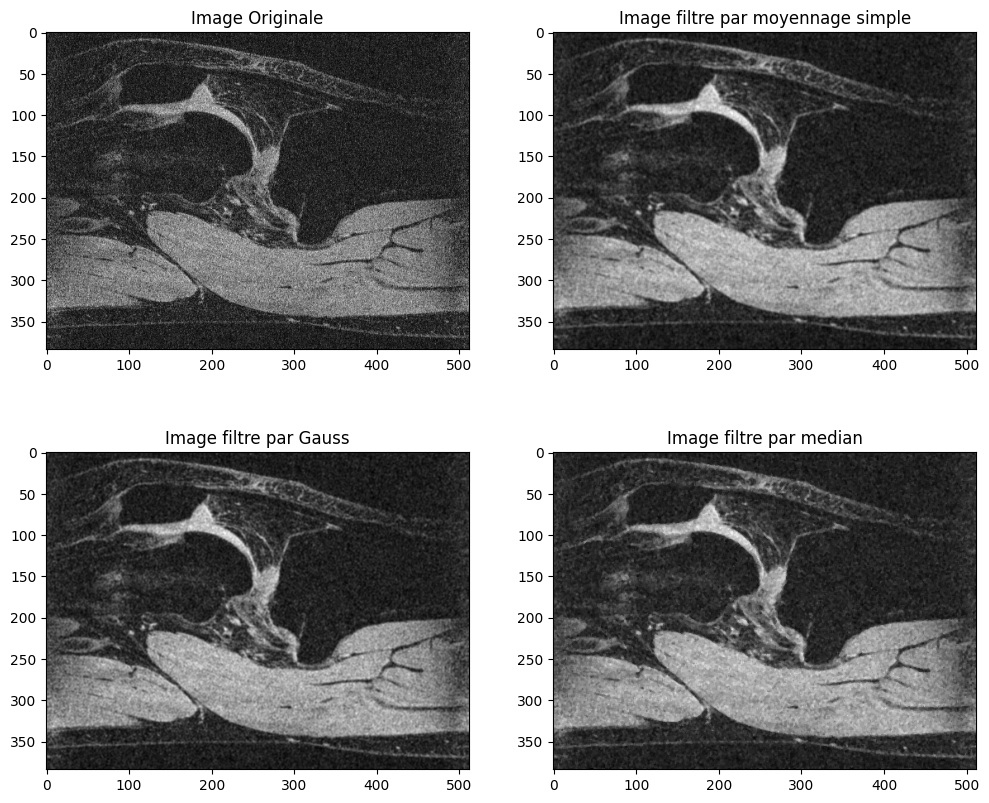

In [7]:
# Inscrivez votre code ici

og_Im = imread('IRM_genou.tif')
moy_Im = cv2.blur(og_Im, (3,3))
gauss_Im = cv2.GaussianBlur(og_Im, (3,3),0)
med_Im = cv2.medianBlur(og_Im,3)


plt.subplot(2,2,1)
plt.imshow(og_Im, cmap = 'gray')
plt.title ('Image Originale')


plt.subplot(2,2,2)
plt.imshow(moy_Im, cmap = 'gray')
plt.title('Image filtre par moyennage simple')

                        
plt.subplot(2,2,3)
plt.imshow(gauss_Im, cmap = 'gray')
plt.title('Image filtre par Gauss')

                        
plt.subplot(2,2,4)
plt.imshow(med_Im, cmap = 'gray')
plt.title('Image filtre par median')
plt.show()

<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE

## 3. Amélioration d’images (6 pts)

Le fichier Lune.tif contient une image de la lune de qualité médiocre, tant du point de
vue de la distribution des niveaux de gris que de la netteté. Le but de cette question est
donc d’appliquer une succession de traitements pour améliorer la qualité de cette image.

### 3.1. Transformations portant sur l’intensité (2 pts)
<div class="alert alert-block alert-warning">

En vous basant sur l’histogramme, effectuez une ou plusieurs transformations portant sur
l’intensité de l’image pour en améliorer le contraste et l’aspect visuel. Quelques
transformations que vous pouvez essayer pour améliorer le contraste sont :

| Transformation | Paramètre(s) | Équation |
| --- | --- | --- |
| Inversion | NA | 1 – 𝑟 |
|Gamma |   𝛾 < 1 si sous-exposé <br/> 𝛾 > 1 si surexposé | 𝑟<sup>𝛾</sup> |
| Logarithme | NA | ln(1 + 𝑟) /ln(2) |
| Exponentielle | NA | 𝑒<sup>𝑟𝑙𝑛(2)</sup> − 1|

<center> ** r correspond à la valeur d’un pixel dans l’image </center>

<b>Note</b> : Il n’est pas conseillé de procéder à l’égalisation de l’histogramme à cette étape-ci.
Expliquez votre choix de transformation que vous avez utilisé pour améliorer l’aspect
visuel de l’image.

</div>

540 466


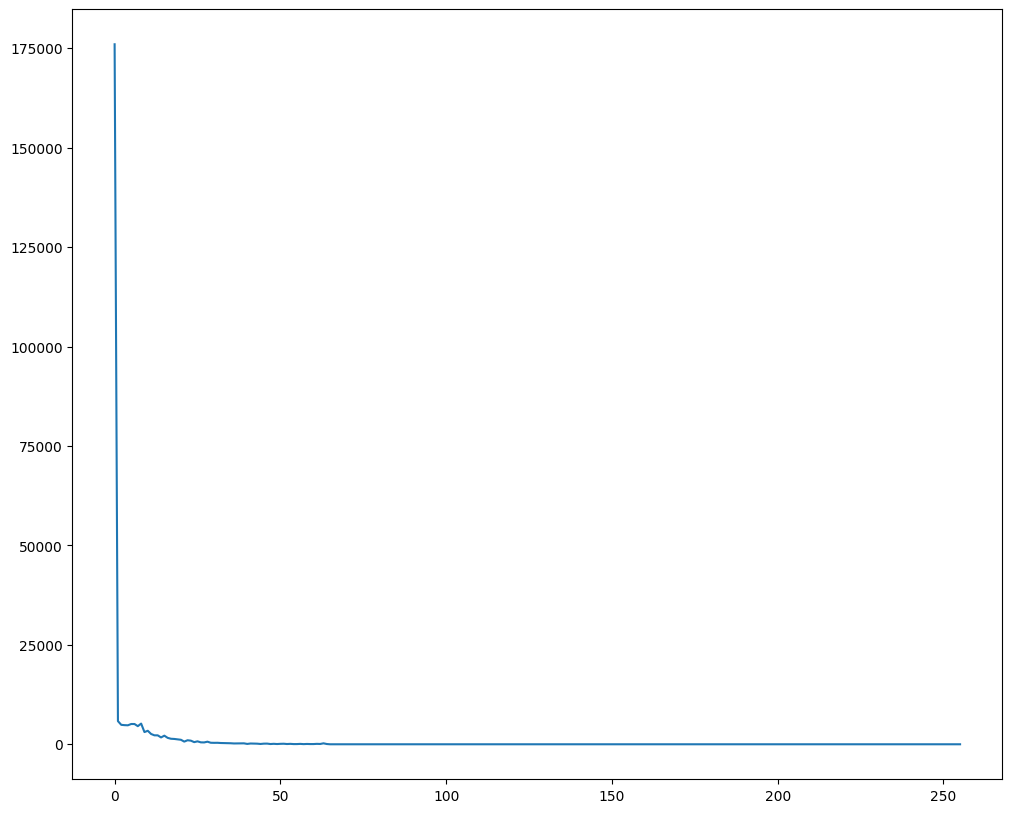

(540, 466)


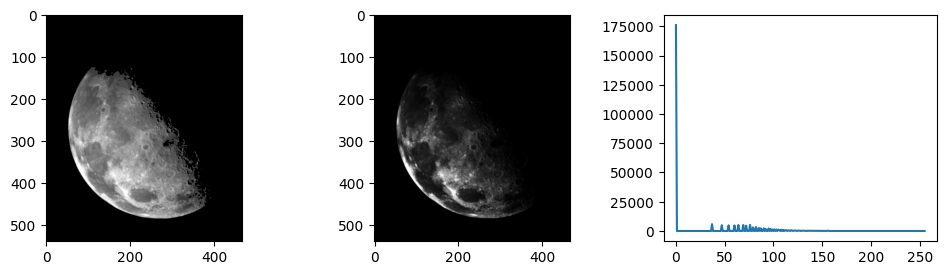

In [8]:
# Inscrivez votre code ici

luneIm = cv2.imread("Lune.tif", cv2.IMREAD_GRAYSCALE)

M,N = luneIm.shape
print(M,N)
histr = cv2.calcHist([luneIm],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()
#plt.imshow(luneIm)

# Define the gamma value

img = luneIm
# Apply the correction
#s = cv2.pow(img/255, gamma)*255
#s = 0.02 * np.log(1 + img)
#s = (np.log(1 + img)) / (np.log(2))
#s = (np.exp(np.log(2)) - 1) * img
#s = 1 - img
s = cv2.pow(img/255, 0.35)
print(s.shape)
s = cv2.convertScaleAbs(s, alpha=255)

# Check if the image is loaded successfully
plt.subplot(3,3,1)
plt.imshow(s, cmap = 'gray')
plt.subplot(3,3,2)
plt.imshow(img, cmap = 'gray')
plt.subplot(3,3,3)

histr = cv2.calcHist([s],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE

### 3.2. Affinage de l’image (2 pts)
<div class="alert alert-block alert-warning">


Appliquez à l’image obtenue à la question précédente un rehaussement par masquage flou
généralisé (Unsharp Filter / Masking en anglais). Ce filtre de convolution est défini par

<center> 𝐺 = 𝐹 + 𝑎 [ 𝐹 − ℎ<sub>𝑏</sub> ∗ 𝐹 ] = 𝐹 + 𝑎 [ 𝐹 − 𝐹′ ] </center>

où F est l’image originale, G est l’image rehaussée, hb est un noyau de convolution agissant
comme un filtre passe-bas, * est un produit de convolution, a est le coefficient de
rehaussement et b contrôle la taille du filtre adoucisseur. Utilisez le filtre par moyennage
pondéré de type Gaussien développé à la question précédente pour calculer l’image floue
𝐹′ = ℎ<sub>𝑏</sub> ∗ 𝐹.

Faites varier la taille du filtre adoucisseur et le coefficient de rehaussement. Qu’observezvous ? Décrivez l’effet de ces paramètres sur l’image rehaussée.
</div>

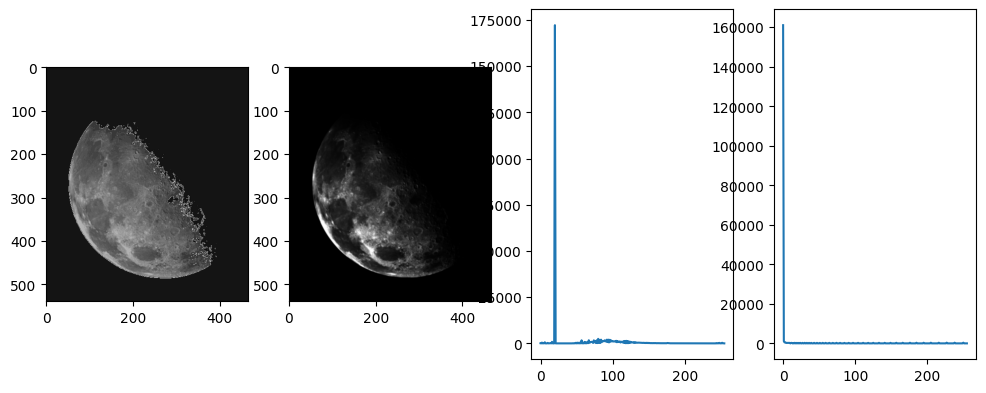

In [15]:
# Inscrivez votre code ici



luneIm = imread('Lune.tif')
gauss_Im = cv2.GaussianBlur(s, (3,3),0)




f = s  +2*(s - gauss_Im) +20

plt.subplot(2,4,1)
plt.imshow(f, cmap = 'gray')
plt.subplot(2,4,2)
plt.imshow(luneIm, cmap = 'gray')
histr = cv2.calcHist([f],[0],None,[256],[0,256])
plt.subplot(2,4,3)
plt.plot(histr)
plt.subplot(2,4,4)
histr = cv2.calcHist([luneIm],[0],None,[256],[0,256])
plt.subplot(2,4,4)
plt.plot(histr)

### 3.3. Égalisation d’histogramme (2 pts)
<div class="alert alert-block alert-warning">


Appliquez une égalisation d’histogramme à une image visuellement satisfaisante obtenue
à la question précédente. Qu’observez-vous ? Expliquez. Comparez au résultat obtenu si
vous appliquez l’égalisation d’histogramme à l’image de la Lune originale sans transformer
son intensité et sans la rehausser par masquage flou. Pourquoi les résultats sont-ils
différents ?
     Vous pouvez utiliser la fonction <code>equalize_histogram(img)</code> et <code>plt.hist</code> de matplotlib.
    
</div>

In [10]:
def equalize_histogram(img):
    # Normaliser l'image de 0 à 255
    img = ((img - img.min()) / (img.max() - img.min()) * 255).astype('uint8')
    hist, bins = np.histogram(img, 256, [0,256])
    T = np.cumsum(hist) # Somme cumulée
    T = (T - T.min()) / (T.max() - T.min()) # Normalisation entre 0 et 1
    return (255 * T[img]).astype('uint8')


In [11]:
# Inscrivez votre code ici
f = equalize_histogram(f)
#plt.imshow(f, cmap = 'gray')
histr = cv2.calcHist([f],[0],None,[256],[0,256])
#plt.subplot(8,1,2)
#plt.plot(histr)

luneImEq = equalize_histogram(luneIm)
#plt.imshow(luneImEq, cmap = 'gray')
histr = cv2.calcHist([luneImEq],[0],None,[256],[0,256])
#plt.subplot(8,1,4)
#plt.plot(histr)

gauss_Im = cv2.GaussianBlur(luneImEq, (3,3),0)
final = luneImEq  +2*(luneImEq - gauss_Im)  +0.2
#plt.imshow(luneImEqExp, cmap = 'gray')
luneImEqExp = cv2.convertScaleAbs(luneImEqExp, alpha=255)

histr = cv2.calcHist([luneImEqExp],[0],None,[256],[0,256])
#plt.subplot(8,1,6)
#plt.plot(histr)




luneImEqExp = cv2.pow(luneImEq/255, 0.9)

plt.subplot(2,2,1)
plt.imshow(final, cmap = 'gray')
plt.subplot(2,2,2)
plt.plot(histr)


NameError: name 'luneImEqExp' is not defined

<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE